### Analysis of fatal police shootings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
#data = pd.read_csv('fatal-police-shootings-data.csv')
data = pd.read_csv('https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3844 entries, 0 to 3843
Data columns (total 14 columns):
id                         3844 non-null int64
name                       3844 non-null object
date                       3844 non-null object
manner_of_death            3844 non-null object
armed                      3596 non-null object
age                        3702 non-null float64
gender                     3841 non-null object
race                       3501 non-null object
city                       3844 non-null object
state                      3844 non-null object
signs_of_mental_illness    3844 non-null bool
threat_level               3844 non-null object
flee                       3708 non-null object
body_camera                3844 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 368.0+ KB


In [54]:
data.describe()

,id,age
count,3844.000000,3702.000000
mean,2155.887097,36.807401
std,1203.996248,13.046212
min,3.000000,6.000000
25%,1115.750000,27.000000
50%,2147.500000,35.000000
75%,3198.250000,45.000000
max,4238.000000,91.000000


This tells us that most of the data in this dataset is categorical, and will need to be converted to numerical values to be useful.

In [8]:
dateUhFrame = data['date'].str.split('-',expand=True)
data['year'] = dateUhFrame[0]
data['month'] = dateUhFrame[1]
data['day'] = dateUhFrame[2]

#data['year'] = data['date'].str.split('-',expand=True)[0]
#data['month'] = data['date'].str.split('-',expand=True)[1]
#data['day'] = data['date'].str.split('-',expand=True)[2]

In [38]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [16]:
data['year'].value_counts()

2015    995
2017    987
2016    963
2018    899
Name: year, dtype: int64

In [17]:
data['month'].value_counts()

03    365
07    360
01    343
02    339
08    332
06    323
10    321
11    316
04    313
05    300
09    286
12    246
Name: month, dtype: int64

In [22]:
data['month'].value_counts().sort_index()

01    343
02    339
03    365
04    313
05    300
06    323
07    360
08    332
09    286
10    321
11    316
12    246
Name: month, dtype: int64

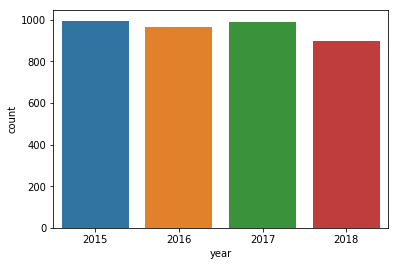

In [5]:
sns.countplot(data=data,x='year')

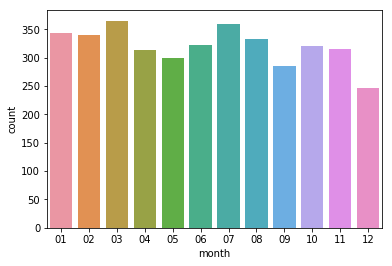

In [15]:
sns.countplot(data=data,x='month')

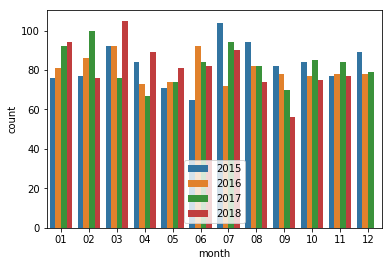

In [14]:
sns.countplot(data=data,x='month', hue='year')
plt.legend(loc='lower center')

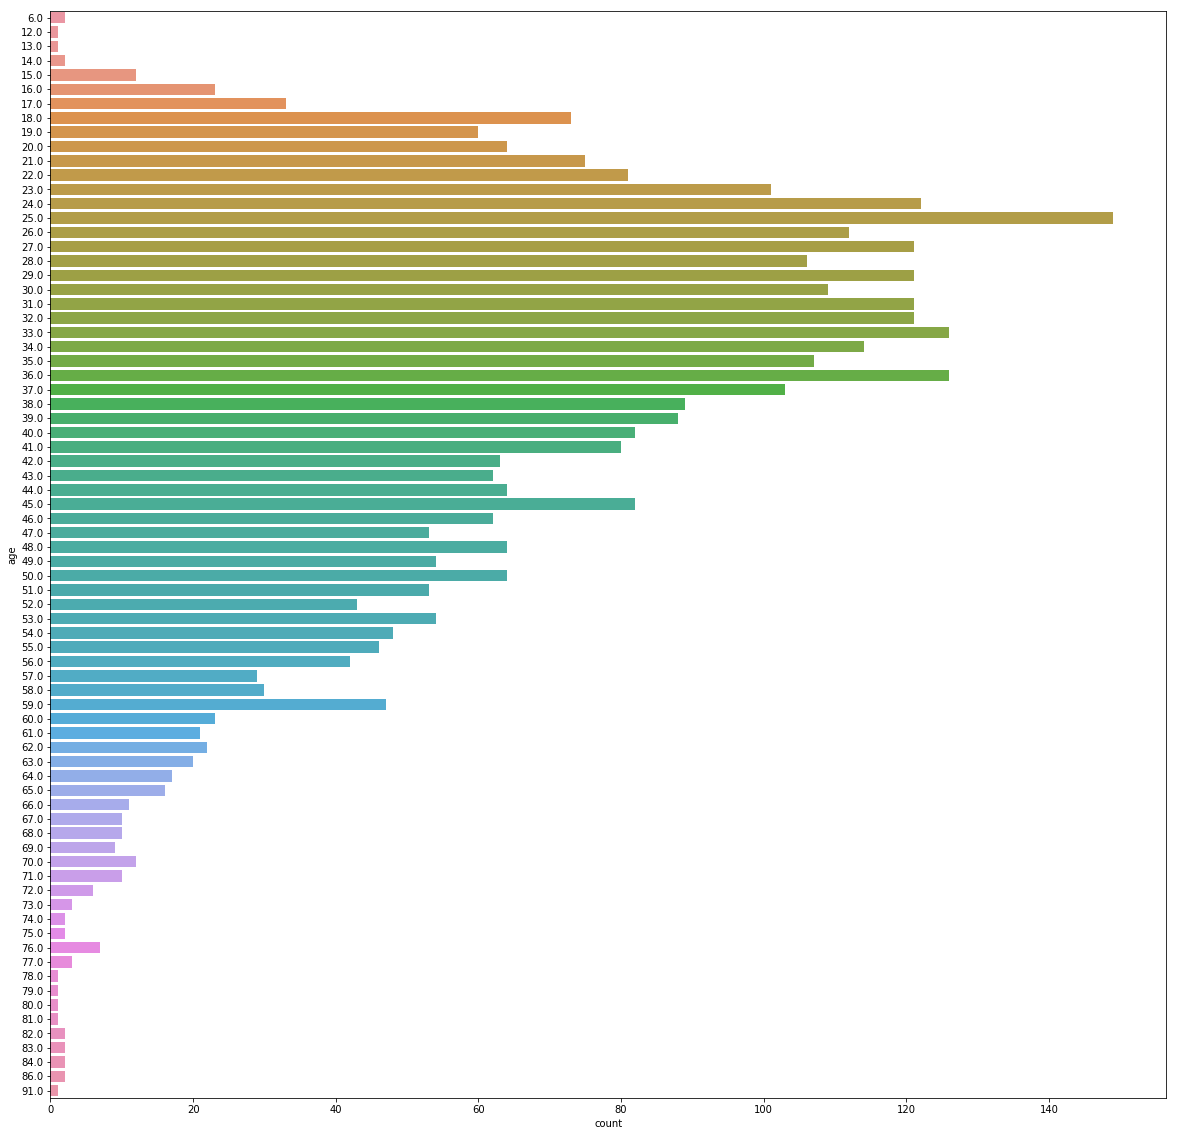

In [29]:
plt.figure(figsize=(20,20))
sns.countplot(data=data,y='age')


In [23]:
data['age'].value_counts().sort_index()

6.0       2
12.0      1
13.0      1
14.0      2
15.0     12
16.0     23
17.0     33
18.0     73
19.0     60
20.0     64
21.0     75
22.0     81
23.0    101
24.0    122
25.0    149
26.0    112
27.0    121
28.0    106
29.0    121
30.0    109
31.0    121
32.0    121
33.0    126
34.0    114
35.0    107
36.0    126
37.0    103
38.0     89
39.0     88
40.0     82
       ... 
57.0     29
58.0     30
59.0     47
60.0     23
61.0     21
62.0     22
63.0     20
64.0     17
65.0     16
66.0     11
67.0     10
68.0     10
69.0      9
70.0     12
71.0     10
72.0      6
73.0      3
74.0      2
75.0      2
76.0      7
77.0      3
78.0      1
79.0      1
80.0      1
81.0      1
82.0      2
83.0      2
84.0      2
86.0      2
91.0      1
Name: age, Length: 76, dtype: int64

## Mental Illnes
What does the signs_of_mental_illness field tell us?

In [36]:
data['signs_of_mental_illness'].value_counts()

False    2939
True      905
Name: signs_of_mental_illness, dtype: int64

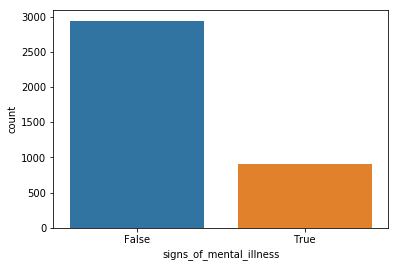

In [30]:
sns.countplot(data=data,x='signs_of_mental_illness')

Or, more easily interpretable:

([<matplotlib.patches.Wedge at 0x1a25760550>,
 [Text(-0.812589,0.741417,''), Text(0.812589,-0.741417,'')])

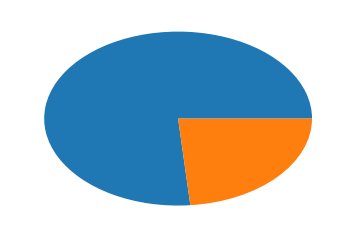

In [34]:
plt.pie(data['signs_of_mental_illness'].value_counts())
#plt.title('Relative Feature Importance')

A first observation: nearly a quarter of all shooting victims show signs of mental illness. It would be interesting to compare this to the general population. My suspicion is that signs of mental illness appear in shooting victims at a much higher rate than the population at large.